# Погрешность измерений
Если о величине $X$ известно, что  $X \in [\bar{X} - \frac{\Delta X}{2}, \bar{X}  +\frac{\Delta X}{2}]$, то

- $\Delta X$ -- абсолютная погрешность
- $\frac{\Delta X}{|\bar{X}|}$ -- относительная погрешность

### Как вычислить ошибку вычисления функции в точке?

# Погрешность при вычислении функции в $x^*$

Рассматриваем произвольную функцию $y = f(x)$. Как отличается $y^* = f(x^*)$, если погрешность измерения $x$ равна $\Delta x$?

Формула Тейлора:
$$f(x) = f(x^*) +  f'(\xi)(x - x^*),~~\xi \in [x, x^*]$$
Тогда,
$$\Delta y \leq |f'(\xi)|\Delta x \leq \|f'\|_{C[x^* - \Delta x, x^* + \Delta x]}\Delta x$$

Тоже формула Тейлора:
$$f(x) = f(x^*) +  f'(x^*)(x - x^*) + O((x - x^*)^2)$$

Тогда, приближенная оценка погрешности:
$$\Delta y \leq |f'(x^*)|\Delta x $$

$f'(x^*) = 0$? Ключевое слово приближенно, пользоваться можно не всегда.

# Ошибка метода
- $e^x \in U_0$
$$e^x \approx \sum\limits_{i = 1}^{n - 1}\frac{x^i}{i!} = alg(x)$$
Тогда
$$|e^x - alg(x)| \leq max(1, e^x)\frac{|x|^n}{n!} = \varepsilon \to 0,~~ n\to \infty$$
так как
$$e^x = alg(x) + e^{\xi}\frac{x^n}{n!},~~\xi \in [0, x]$$

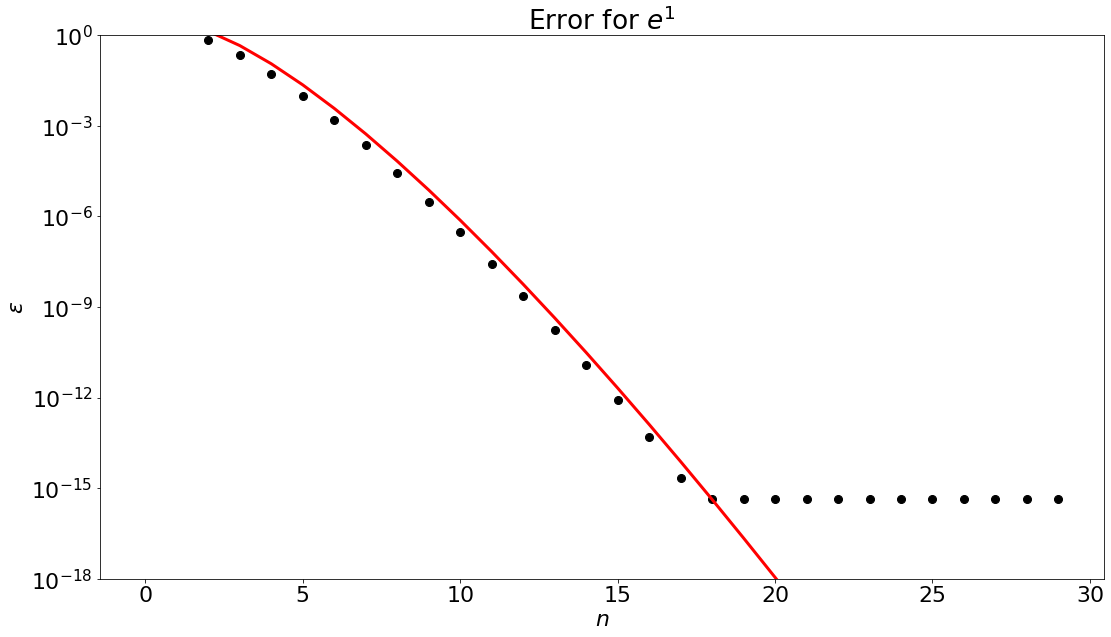

In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

def myexp(x, n):
    S = 0.
    a = 1.
    for k in range(n):
        S += a
        a *= x / (k + 1)
    return S

x = 1
ns = range(30) 
errs = [];
for n in ns:
    errs.append(abs(np.exp(x) - myexp(x, n)))
ns = np.array(ns)

plt.figure(figsize=(18, 10))
plt.semilogy(ns, errs, 'k.', ms=16)
plt.semilogy(ns, max(1, np.exp(x)) * x**ns / gamma(ns+1), 'r', lw=3)
plt.ylim([1e-18, 1])
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.title('Error for $e^{%g}$' % x)
plt.show()

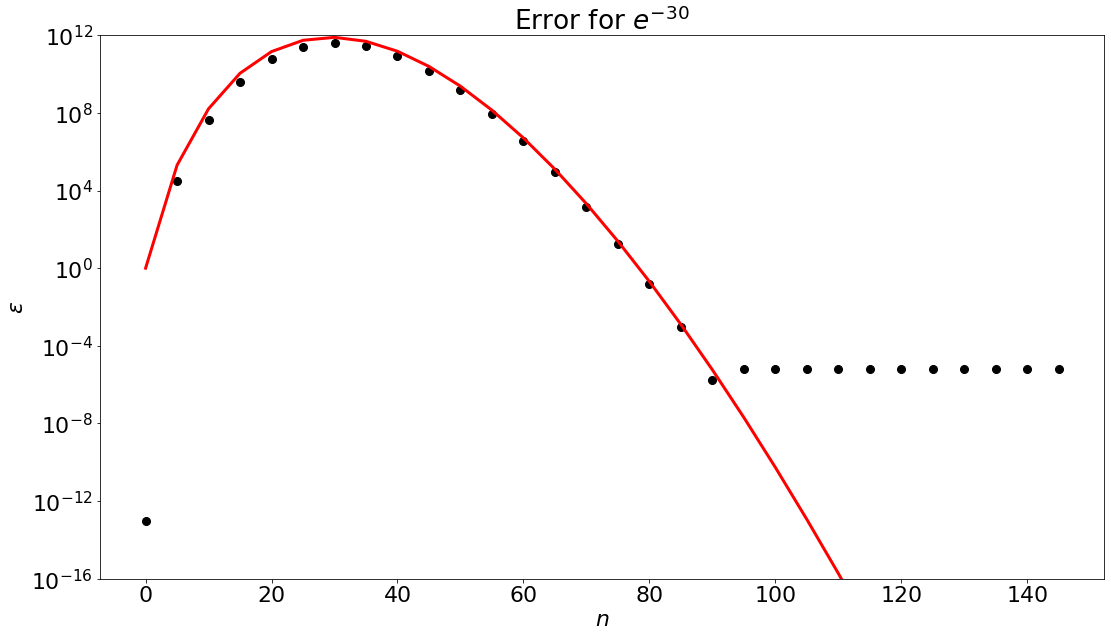

In [2]:
from scipy.special import loggamma
ns = []; errs = [];
x = -30
for n in range(0, 150, 5):
    ns.append(n)
    errs.append(abs(np.exp(x) - myexp(x, n)))
ns = np.array(ns)
plt.figure(figsize=(18, 10))
plt.semilogy(ns, errs, 'k.', ms=16)
plt.semilogy(ns, max(1, np.exp(x)) * np.exp(ns * np.log(abs(x)) \
                            - np.real(loggamma(ns+1))), 'r-', lw=3)
plt.ylim([1e-16, 1e12])
plt.title('Error for $e^{%g}$' % x)
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.show()

# Ошибка метода

Все дело в ошибке при округлении, которая добавляется с с каждым слагаемым.

Для пример теперь рассмотрим $sin(x)$

$$alg(x) = \sum\limits_{i = 0}^n(-1)^i\frac{x^{2i + 1}}{(2i + 1)!}$$

Тогда, $\delta = 2^{-K}$
$$\varepsilon_{round} = \sum\limits_{i = 0}^n \left|\delta (-1)^i\frac{x^{2i + 1}}{(2i + 1)!}\right| \leq \delta\sinh(x)$$

**NB!** Если хвост знакомеременного ряда монотонно убывает, то ошибку метода можно оценить первым отброшенным.

# Численное дифференцирование

Дана функция, вычислять которую можем только в точках (оракул 0-порядка) с погрешностью $\Delta f$. 

Как оценить производну, при условии, что функция достаточно гладкая?

Вспомните определение! Тогда

$$f'(x) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$

Оценим ошибку метода:
$$f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(\xi)}{2}h_2,~~\xi \in [x_0, x_0 + h]$$
Тогда
$$|f'(x_0) - alg(x)| = \frac{\max_{\xi}f''(\xi)}{2}h \to 0,~~h\to 0$$
$$\varepsilon_{method} = O(h)$$
Степень $h$ определяет порядок метода.

И это все? В общем случае
$$f'(x_0) \approx \frac{\alpha f(x_0 - h) + \beta f(x_0) + \gamma f(x_0 + h)}{h}$$

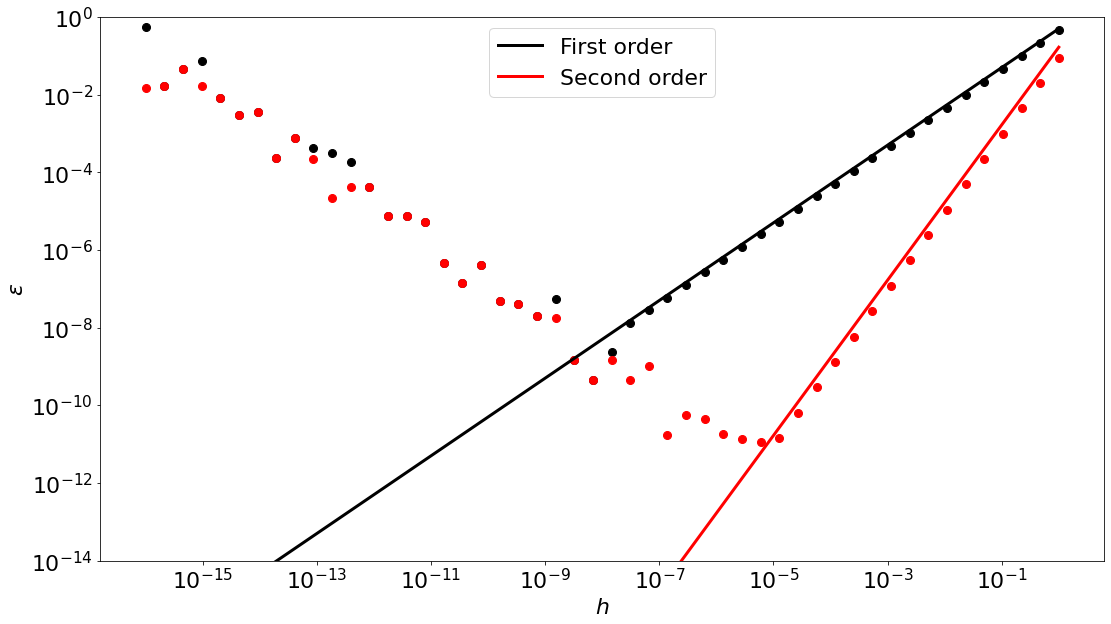

In [3]:
def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1
errs1 = []
errs2 = []
for h in hs:
    errs1.append(abs(diff1(np.sin, 1, h) - np.cos(1)))
    errs2.append(abs(diff2(np.sin, 1, h) - np.cos(1)))

M2 = M3 = 1
plt.figure(figsize=(18, 10))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()

# Погрешности при дифференцировании

Но функция же вычисляется неточно, тогда

$$\varepsilon_{f} = 2\frac{\Delta f}{h} \to \infty,~~ h \to 0$$
$$\varepsilon_{total} = \varepsilon_{f} + \varepsilon_{method} \to \min_{h > 0}$$

Получаем оптимальный шаг.

# Нормы, пространства

**Def.**
- $\|x\| = 0$ iff $x = 0$
- $\|\alpha x\| = |\alpha|\|x\|$
- $\|x + y\| \leq \|x\| + \|y\|$

p-норма
$$\|x\|^p_p = \sum\limits_{i = 1}^n\|x_i\|^p$$

В конечномерных пространствах все нормы эквиваленты. Но они могут изменить свойства метода, где используются.

Таким образом ошибку можно измерять в любом метрическом пространстве.